<a href="https://colab.research.google.com/github/mkandaleft/COMP432-GroupM/blob/main/Comp432.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Basic includes.
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics
import torch
import torchvision
import random

# Do we need pandas, etc?

# Use the GPU if available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [24]:
# Task specific includes.
import zipfile

# Download and unzip the first dataset.
!gdown 1ezX0lJaB8atZesMns4cGHR3pXkRTEKSt # Roxane: I put the dataset on my Drive for ease of downloading.

with zipfile.ZipFile("/content/Dataset1.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

data_path = "/content/Colorectal Cancer_"

Downloading...
From: https://drive.google.com/uc?id=1ezX0lJaB8atZesMns4cGHR3pXkRTEKSt
To: /content/Dataset1.zip
100% 814M/814M [00:05<00:00, 151MB/s]


In [25]:
# Load the data to a torch tensor.

# Code partly provided by the outline for assignment 1.
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # Data normalization done here.
dataset = torchvision.datasets.ImageFolder(data_path, transforms) # Load the images and their labels into a tensor.

train_set, test_set = torch.utils.data.random_split(dataset, [0.7,0.3]) # Split the dataset into training and testing set.

batch_size = 100 # What batch size do we want?
train_loader = torch.utils.data.DataLoader(train_set, shuffle=True, batch_size=batch_size)#, num_workers=2) # Create train loader. The multiple workers were being a fuck :/
test_loader = torch.utils.data.DataLoader(test_set, shuffle=True)#, num_workers=2) # Create test loader.

torch.Size([3, 224, 224]) 0


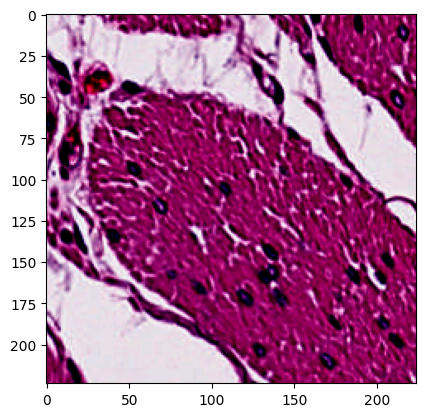

In [26]:
# Look at a random sample from the normalized training set.
index = random.randint(0, len(train_set))
image, label = train_set[index]
plt.imshow(image.numpy().transpose(1, 2, 0))
print(image.shape, label)

# Instead, print the same image before and after loading in the dataset?

# Preprocess the data.
# Do we need to do data augmentation?

In [27]:
## Declare the model
# https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html

resnet18 = torchvision.models.resnet18() # Do we need any special parameters?
resnet18 = resnet18.to(device)

In [28]:
# Train the model with the dataset.

learning_rate = 0.005
num_epoch = 10

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(resnet18.parameters(), lr = learning_rate, momentum = 0.9, weight_decay = 0.001) # Customize other params?
#optimizer = torch.optim.Adam(resnet18.parameters(), lr = learning_rate) # Should we use adam instead of SGD? It didn't give good results when I tried.

next_epoch = 1
for epoch in range(next_epoch, next_epoch+num_epoch):
    resnet18.train()

    for i, batch in enumerate(train_loader, 0):
        X, y = batch

        X = X.to(device)
        y = y.to(device)

        y_pred = resnet18(X)
        loss = loss_function(y_pred, y)

        resnet18.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, loss.item()))

next_epoch = epoch+1

Epoch  1: loss on final training batch: 0.2873
Epoch  2: loss on final training batch: 0.3344
Epoch  3: loss on final training batch: 0.2051
Epoch  4: loss on final training batch: 0.0752
Epoch  5: loss on final training batch: 0.1118
Epoch  6: loss on final training batch: 0.1269
Epoch  7: loss on final training batch: 0.0749
Epoch  8: loss on final training batch: 0.0747
Epoch  9: loss on final training batch: 0.0317
Epoch 10: loss on final training batch: 0.0355


In [29]:
# Testing time!

# Roxane: I mostly copied the work I'd done for my assignment 1, so we'll likely need to modify this, have it print more info, etc.

resnet18.eval()

# Test and report on the training data.
y_train_true = []
y_train_pred = []

for data in train_loader:
  train_inputs, train_labels = data
  train_inputs, train_labels = train_inputs.to(device), train_labels.to(device)
  y_train_true.extend(train_labels.tolist())

  output = torch.softmax(resnet18(train_inputs), dim=1)
  y_train_pred.extend(output.argmax(dim=1).cpu().numpy().tolist())

class_report_train = sklearn.metrics.classification_report(y_train_true, y_train_pred)
print("Classification report for the training set:")
print(class_report_train)


# Test and report on the testing data.
y_test_true = []
y_test_pred = []

for data in test_loader:
  test_inputs, test_labels = data
  test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
  y_test_true.extend(test_labels.tolist())

  output = torch.softmax(resnet18(test_inputs), dim=1)
  y_test_pred.extend(output.argmax(dim=1).cpu().numpy().tolist())

class_report_test = sklearn.metrics.classification_report(y_test_true, y_test_pred)
print("\nClassification report for the testing set:")
print(class_report_test)

Classification report for the training set:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1398
           1       0.99      1.00      0.99      1415
           2       1.00      0.89      0.94      1387

    accuracy                           0.96      4200
   macro avg       0.97      0.96      0.96      4200
weighted avg       0.97      0.96      0.96      4200


Classification report for the testing set:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       602
           1       0.96      0.99      0.97       585
           2       0.99      0.83      0.90       613

    accuracy                           0.93      1800
   macro avg       0.94      0.93      0.93      1800
weighted avg       0.94      0.93      0.93      1800

